In [2]:
import torch
import numpy as np
from PIL import Image

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Скачиваем библиотеку ultlalytics для скачивания и дообучения предобученной модели

In [4]:
!pip download ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.1 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.7 MB/s eta 0:00:00
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp310-cp

In [5]:
# from ultralytics import YOLO

In [6]:
# model = YOLO("yolov8m.pt")

In [7]:
# # results = model.predict('/content/drive/MyDrive/data_final/images/val/2489_lidar_heights_20240403T072804.997786.jpg')
# # results = model.predict('/content/drive/MyDrive/data_final/images/train/2620_lidar_heights_20240406T112648.295828.jpg')
# results = model.predict('/content/drive/MyDrive/data_final/images/val/3895_lidar_heights_20240425T124951.573919.jpg')

In [8]:
# result = results[0]

In [9]:
# len(result.boxes)

In [10]:
# box = result.boxes[0]

In [11]:
# print("Object type:", box.cls)
# print("Coordinates:", box.xyxy)
# print("Probability:", box.conf)

In [12]:
# print("Object type:",box.cls[0])
# print("Coordinates:",box.xyxy[0])
# print("Probability:",box.conf[0])

In [13]:

# cords = box.xyxy[0].tolist()
# class_id = box.cls[0].item()
# conf = box.conf[0].item()
# print("Object type:", class_id)
# print("Coordinates:", cords)
# print("Probability:", conf)

In [14]:
# print(result.names)

In [15]:
# cords = box.xyxy[0].tolist()
# cords = [round(x) for x in cords]
# class_id = result.names[box.cls[0].item()]
# conf = round(box.conf[0].item(), 2)
# print("Object type:", class_id)
# print("Coordinates:", cords)
# print("Probability:", conf)

In [16]:
# for box in result.boxes:
#   class_id = result.names[box.cls[0].item()]
#   cords = box.xyxy[0].tolist()
#   cords = [round(x) for x in cords]
#   conf = round(box.conf[0].item(), 2)
#   print("Object type:", class_id)
#   print("Coordinates:", cords)
#   print("Probability:", conf)
#   print("---")

In [17]:
# Image.fromarray(result.plot()[:,:,::-1])

Скачивание модели и её обучение.

In [18]:
from ultralytics import YOLO

In [20]:
model = YOLO('yolov10m.pt')

100%|██████████| 32.1M/32.1M [00:00<00:00, 121MB/s]


In [23]:
model.train(data='/content/drive/MyDrive/data_iitp_yaml.yaml', epochs = 100, batch = 0.75, device = 0, verbose = True, single_cls = True)

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/drive/MyDrive/data_iitp_yaml.yaml, epochs=100, time=None, patience=100, batch=0.75, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning /content/drive/MyDrive/data_truck1500/labels/train.cache... 1400 images, 743 backgrounds, 0 corrupt: 100%|██████████| 1400/1400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/data_truck1500/labels/val.cache... 600 images, 313 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.73G      3.716       4.47      3.199         22        640: 100%|██████████| 88/88 [01:01<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        600       1165   0.000245     0.0378   0.000134   3.61e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.95G      4.049      4.229      3.441         14        640: 100%|██████████| 88/88 [00:57<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.95it/s]

                   all        600       1165     0.0669     0.0841     0.0208    0.00652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100        10G      4.004      4.395      3.457         21        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        600       1165     0.0107     0.0464    0.00722    0.00148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        10G      4.019      4.429      3.443         21        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.27it/s]


                   all        600       1165      0.208      0.129     0.0943     0.0331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        10G      3.905      4.075      3.404         21        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.59it/s]

                   all        600       1165      0.324      0.312      0.224      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.98G      3.838      3.951      3.311         27        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.31it/s]

                   all        600       1165      0.373      0.375      0.299      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        10G      3.715      3.777      3.231         14        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.38it/s]

                   all        600       1165      0.444      0.391      0.359      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.99G       3.66      3.777      3.197         34        640: 100%|██████████| 88/88 [00:57<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.48it/s]

                   all        600       1165      0.511      0.427      0.436      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        10G      3.507      3.511      3.048         23        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.12it/s]

                   all        600       1165      0.529      0.422      0.452      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        10G      3.427      3.355      3.045         26        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

                   all        600       1165      0.472      0.458      0.412      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.99G      3.357      3.277      2.991         13        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.43it/s]

                   all        600       1165      0.524      0.486      0.483      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        10G      3.286      3.269      2.926         23        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.11it/s]

                   all        600       1165      0.466      0.445      0.442      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        10G       3.26      3.045      2.867         10        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.55it/s]

                   all        600       1165      0.586      0.482       0.51      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        10G      3.122      2.952      2.833         20        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.93it/s]

                   all        600       1165       0.55      0.549      0.556      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        10G      3.163      3.045      2.855         25        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.58it/s]

                   all        600       1165      0.578      0.526      0.547      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.97G       3.12      2.954      2.825         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.25it/s]

                   all        600       1165      0.613      0.536      0.556      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.99G      3.095      2.905      2.793          7        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.05it/s]

                   all        600       1165      0.631      0.591       0.62      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        10G      2.968      2.719      2.741         15        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.30it/s]

                   all        600       1165      0.639      0.568      0.616      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        10G      2.956      2.651       2.72         33        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.31it/s]

                   all        600       1165      0.648      0.576       0.63      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        10G      2.921       2.57      2.717         17        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.95it/s]

                   all        600       1165        0.6      0.623      0.635      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        10G      2.833      2.505      2.636         52        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        600       1165      0.628      0.644      0.676      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        10G      2.833      2.469      2.653         16        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.62it/s]

                   all        600       1165      0.712      0.641      0.706      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100        10G      2.733       2.36       2.58         14        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all        600       1165      0.724      0.611      0.706      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.99G      2.708      2.282      2.572         29        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        600       1165       0.73      0.681      0.741      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.98G      2.684      2.207      2.548         25        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.13it/s]

                   all        600       1165      0.751      0.647       0.74      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        10G      2.657       2.23      2.539         24        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all        600       1165      0.703      0.687      0.755      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        10G       2.56      2.081      2.478         18        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.36it/s]

                   all        600       1165      0.762       0.68      0.768      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.99G      2.531      2.116      2.454         19        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.93it/s]

                   all        600       1165      0.765       0.69      0.777      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.98G      2.504      1.991      2.431         21        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600       1165      0.748      0.702      0.781        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.99G      2.545      2.021      2.445         30        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        600       1165      0.814      0.729      0.822      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.99G      2.473      1.925      2.405         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.94it/s]

                   all        600       1165      0.796      0.729      0.818       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.99G      2.389       1.86      2.357         27        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

                   all        600       1165      0.835      0.758      0.839      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100        10G      2.329      1.777      2.358         47        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        600       1165      0.807      0.775       0.84      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100        10G      2.321      1.746      2.357         18        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        600       1165      0.829      0.747      0.843       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        10G      2.355      1.791      2.383         25        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.15it/s]

                   all        600       1165      0.865       0.73      0.852      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        10G      2.275      1.678      2.276         15        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.27it/s]

                   all        600       1165      0.859      0.764      0.865      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        10G      2.224      1.653      2.266         49        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        600       1165      0.827      0.788      0.868      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.98G      2.172      1.611      2.258         16        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.96it/s]

                   all        600       1165      0.862      0.775      0.867      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        10G      2.147      1.558      2.229         30        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        600       1165      0.882      0.784      0.889      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        10G      2.123      1.534       2.23         27        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.44it/s]

                   all        600       1165      0.864      0.771      0.869      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.97G      2.067      1.476      2.187         18        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.10it/s]

                   all        600       1165      0.882      0.806      0.895      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.97G      2.075      1.514      2.202         36        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        600       1165      0.861      0.824      0.896      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.98G      2.115      1.506      2.206         23        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.96it/s]

                   all        600       1165      0.899       0.83      0.912       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.99G      2.047      1.461      2.196         28        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.57it/s]

                   all        600       1165      0.887      0.801      0.896      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.99G      1.983      1.384      2.147         29        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600       1165       0.89      0.813      0.897      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        10G      2.015      1.423      2.178         30        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600       1165      0.887      0.809      0.901      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        10G      1.973      1.408      2.154         39        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.50it/s]

                   all        600       1165      0.892      0.815      0.906      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.99G      1.945      1.371      2.147         44        640: 100%|██████████| 88/88 [00:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.95it/s]

                   all        600       1165      0.886      0.818      0.914      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.98G      1.893      1.322      2.106         27        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.31it/s]

                   all        600       1165      0.899      0.826      0.917      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        10G       1.85      1.304      2.102         26        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.48it/s]

                   all        600       1165      0.878      0.866      0.926      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        10G      1.855      1.257      2.083         10        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]

                   all        600       1165      0.923      0.839      0.929      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.99G      1.809      1.238      2.061         18        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        600       1165      0.897      0.856      0.926      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100        10G      1.821      1.232      2.086         42        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all        600       1165      0.934      0.865      0.939      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.99G       1.74      1.207      2.032         39        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        600       1165      0.919      0.858      0.938      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.98G      1.769      1.192      2.031         41        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.24it/s]

                   all        600       1165      0.923      0.862      0.934      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        10G      1.756      1.195      2.028         33        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.48it/s]

                   all        600       1165      0.909      0.876      0.944      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100        10G      1.726      1.169       2.04         28        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        600       1165      0.904      0.851      0.938      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.98G       1.65      1.107      2.007         15        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.55it/s]

                   all        600       1165       0.94      0.855      0.947      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.99G      1.701      1.135      2.018         17        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.96it/s]

                   all        600       1165      0.925      0.863      0.948      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        10G      1.662      1.122      2.014         45        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.78it/s]

                   all        600       1165      0.915      0.847       0.94      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100        10G      1.638      1.079       1.98         17        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.91it/s]

                   all        600       1165       0.93      0.881      0.949       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        10G      1.629      1.082      1.998         17        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        600       1165      0.944      0.864       0.95      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        10G      1.568      1.033      1.952         24        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all        600       1165      0.912      0.889      0.951      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.99G      1.579      1.086      1.984         28        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        600       1165      0.948      0.878      0.954      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.98G      1.575      1.059      1.973         22        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.48it/s]

                   all        600       1165      0.956      0.864      0.953      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        10G      1.572      1.043      1.971         37        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        600       1165      0.925      0.896      0.952      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.99G      1.525       1.01      1.953         25        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.96it/s]

                   all        600       1165       0.94      0.879      0.958      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.99G      1.567      1.034      1.956         32        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.34it/s]

                   all        600       1165      0.928      0.888      0.954      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100        10G      1.533      1.019      1.946         37        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        600       1165      0.963      0.883      0.962      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        10G      1.482     0.9793      1.935         27        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all        600       1165      0.935      0.894      0.962      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100        10G      1.469     0.9725      1.912         31        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        600       1165      0.949      0.911      0.966      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        10G      1.456     0.9387      1.921         35        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.49it/s]

                   all        600       1165      0.952      0.891      0.961      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100        10G      1.444     0.9427       1.92         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.50it/s]

                   all        600       1165       0.93      0.916      0.966      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        10G      1.404     0.9156      1.892         24        640: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]

                   all        600       1165      0.949      0.916      0.965      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        10G      1.392     0.9465      1.905         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.26it/s]

                   all        600       1165      0.938      0.901      0.968      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.98G      1.428     0.9408      1.908         67        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.55it/s]

                   all        600       1165      0.968      0.894      0.968      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.99G      1.395     0.9039      1.888         25        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        600       1165      0.947      0.909      0.968      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        10G      1.347     0.8829      1.876         63        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        600       1165      0.935      0.916      0.965      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        10G      1.352     0.8935      1.882         33        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.43it/s]

                   all        600       1165      0.941      0.918      0.969      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        10G      1.326     0.8758      1.873         22        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]

                   all        600       1165      0.948       0.92       0.97      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100        10G      1.356     0.9041      1.899         30        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.05it/s]

                   all        600       1165      0.952      0.911       0.97      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        10G      1.342     0.8799      1.889         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.31it/s]

                   all        600       1165      0.946      0.916       0.97      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        10G      1.333     0.8919      1.877         23        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.71it/s]

                   all        600       1165      0.959      0.907      0.971      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.99G      1.296     0.8532      1.859         44        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        600       1165      0.961      0.911      0.972      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.97G      1.281       0.85      1.871         27        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

                   all        600       1165      0.966      0.899      0.972      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.99G      1.288       0.83       1.86         57        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        600       1165      0.968      0.902      0.974      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        10G      1.255     0.8147      1.846         36        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.04it/s]

                   all        600       1165      0.955      0.912      0.973      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        10G      1.242     0.8086      1.846         26        640: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.65it/s]

                   all        600       1165      0.949      0.918      0.972      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100        10G      1.263     0.8328      1.846         26        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.52it/s]

                   all        600       1165      0.961      0.894      0.973      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        10G      1.224     0.7976       1.83         50        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]

                   all        600       1165       0.96      0.908      0.973      0.883


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        10G      1.159     0.7255      1.799         11        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.44it/s]

                   all        600       1165      0.946      0.928      0.974      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.97G      1.117     0.6885      1.759         21        640: 100%|██████████| 88/88 [00:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        600       1165      0.938      0.931      0.976       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        10G      1.094      0.653      1.759          5        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        600       1165      0.961      0.924      0.975      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.97G      1.072     0.6631      1.747         17        640: 100%|██████████| 88/88 [00:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]

                   all        600       1165      0.945      0.935      0.978       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.99G      1.083      0.662      1.757         14        640: 100%|██████████| 88/88 [00:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all        600       1165      0.953      0.931      0.977      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.98G      1.066      0.652      1.744          5        640: 100%|██████████| 88/88 [00:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        600       1165      0.952      0.937      0.978      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.98G      1.048     0.6353      1.739         15        640: 100%|██████████| 88/88 [00:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        600       1165      0.964      0.918      0.978      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.98G          1     0.6038       1.73         23        640: 100%|██████████| 88/88 [00:53<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        600       1165      0.958      0.927      0.979      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.97G      1.022      0.627      1.752         15        640: 100%|██████████| 88/88 [00:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all        600       1165       0.95      0.924      0.978      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        10G      1.031     0.6427      1.733          5        640: 100%|██████████| 88/88 [00:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.09it/s]

                   all        600       1165      0.949      0.936      0.978      0.904



100 epochs completed in 1.908 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 33.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,451,542 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]


                   all        600       1165      0.955      0.929      0.979      0.904
Speed: 0.4ms preprocess, 8.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dacbf43d3c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

***v10M - 15 m params***

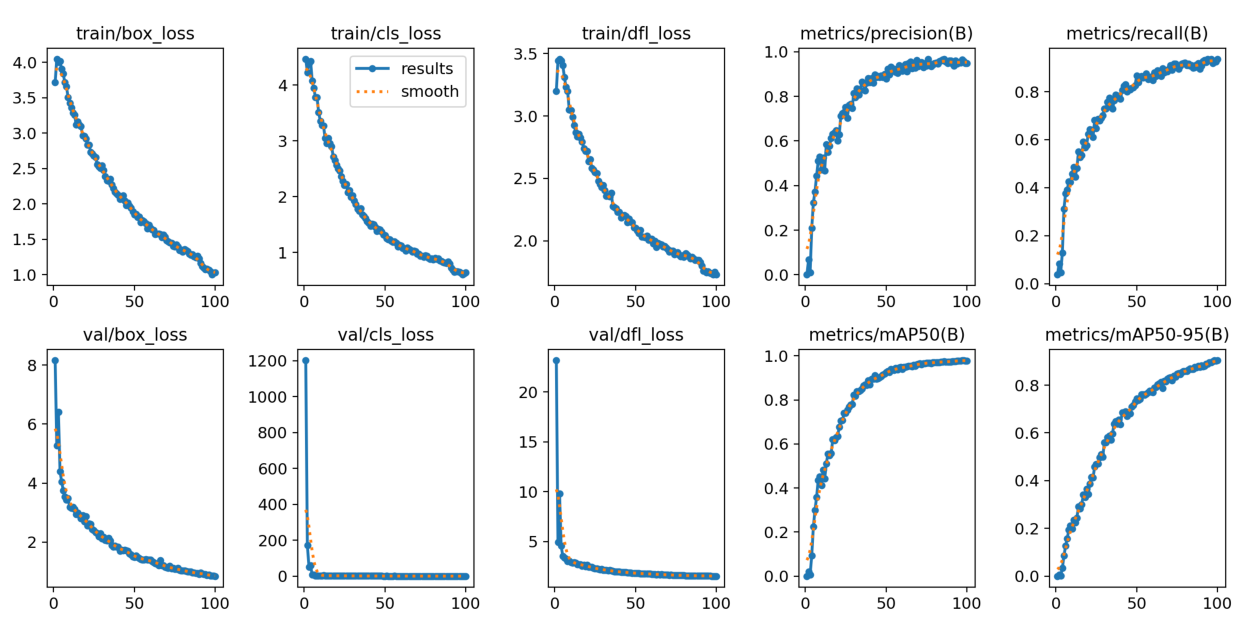

In [25]:
import matplotlib.pyplot as plt

img = Image.open('/content/runs/detect/train3/results.png')
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
model = YOLO('/content/runs/detect/train3/weights/last.pt')

In [30]:
model.train(data='/content/drive/MyDrive/data_iitp_yaml.yaml', epochs = 100, batch = 16, device = 0, verbose = True, single_cls = True)

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train3/weights/last.pt, data=/content/drive/MyDrive/data_iitp_yaml.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/drive/MyDrive/data_truck1500/labels/train.cache... 1400 images, 743 backgrounds, 0 corrupt: 100%|██████████| 1400/1400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/data_truck1500/labels/val.cache... 600 images, 313 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.45G      1.296     0.8393      1.858         22        640: 100%|██████████| 88/88 [01:00<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all        600       1165      0.933      0.895      0.961      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.31G       1.53      1.008      1.934         14        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all        600       1165      0.907      0.845      0.924      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.34G      1.717      1.194      2.006         21        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.57it/s]

                   all        600       1165      0.899      0.849      0.919      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.35G      1.923      1.349      2.101         21        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.19it/s]

                   all        600       1165      0.871       0.82      0.903      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.36G      1.939      1.402      2.132         21        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        600       1165      0.745      0.696      0.775      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.34G      2.004      1.486      2.164         27        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all        600       1165      0.839      0.829      0.893      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.34G      1.879      1.295      2.078         14        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        600       1165      0.896      0.837      0.916      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.33G      1.869      1.282      2.089         34        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        600       1165      0.912       0.83      0.924      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.35G       1.82      1.223      2.047         23        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.42it/s]

                   all        600       1165      0.934      0.857      0.939      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.36G      1.783      1.218       2.06         26        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        600       1165      0.886      0.835      0.911      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.33G      1.797      1.232      2.051         13        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all        600       1165      0.905      0.875      0.937      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.36G       1.77      1.251      2.031         23        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.94it/s]

                   all        600       1165      0.882      0.833       0.91      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.33G      1.785      1.239      2.017         10        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.35it/s]

                   all        600       1165      0.898      0.878      0.939      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.34G      1.704      1.149      2.008         20        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all        600       1165      0.942      0.845      0.939      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.34G       1.75      1.175      2.026         25        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all        600       1165      0.919      0.875      0.945      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       9.3G      1.729      1.146       2.03         22        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]

                   all        600       1165      0.924      0.868      0.948      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.33G      1.709      1.155          2          7        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.31it/s]

                   all        600       1165      0.923      0.876      0.939      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.33G      1.666       1.13      2.005         15        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.50it/s]

                   all        600       1165       0.93      0.864      0.947      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.32G      1.602      1.054      1.976         33        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.87it/s]

                   all        600       1165       0.93      0.885      0.945      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.33G      1.621      1.073      1.986         17        640: 100%|██████████| 88/88 [00:57<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.58it/s]

                   all        600       1165      0.928      0.891      0.959        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.36G      1.624      1.086      1.963         52        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all        600       1165      0.905      0.909      0.953      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.37G       1.63      1.115      1.984         16        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.24it/s]

                   all        600       1165        0.9      0.862      0.937      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.36G      1.601      1.073      1.965         14        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        600       1165      0.926      0.871      0.945       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.33G      1.574      1.045      1.953         29        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        600       1165      0.944      0.865       0.95      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.34G      1.538     0.9986      1.944         25        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        600       1165      0.942      0.892       0.96      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.34G       1.59      1.054      1.972         24        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        600       1165      0.907      0.908      0.964      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.34G      1.485     0.9812      1.912         18        640: 100%|██████████| 88/88 [00:57<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all        600       1165      0.957      0.898      0.968      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.34G      1.515      0.985      1.943         19        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        600       1165      0.923      0.899      0.959      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       9.3G      1.473     0.9565      1.904         21        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

                   all        600       1165      0.946      0.897      0.965      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.33G      1.513     0.9731      1.926         30        640: 100%|██████████| 88/88 [00:57<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        600       1165      0.938      0.905      0.966      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.34G      1.476     0.9781      1.913         22        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]

                   all        600       1165      0.932        0.9      0.961      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.34G       1.48     0.9442      1.903         27        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.41it/s]

                   all        600       1165      0.955      0.882      0.967      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.35G      1.421     0.9275      1.904         47        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.55it/s]

                   all        600       1165      0.933      0.914      0.966      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.35G      1.404     0.9062      1.906         18        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.65it/s]

                   all        600       1165      0.924      0.914      0.964      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.37G      1.442     0.9644      1.927         25        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]

                   all        600       1165      0.919      0.914      0.967      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.33G      1.411     0.9157      1.875         15        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.07it/s]

                   all        600       1165      0.918      0.916      0.966      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.35G      1.416     0.9182      1.885         49        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]

                   all        600       1165      0.933      0.918      0.964      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.33G      1.399     0.8935      1.878         16        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.09it/s]

                   all        600       1165      0.928      0.924      0.968      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.33G      1.387     0.8909      1.876         30        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.14it/s]

                   all        600       1165       0.91       0.88      0.942      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.36G      1.371     0.8644      1.882         27        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.55it/s]

                   all        600       1165      0.944      0.906      0.971      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.32G      1.353       0.88      1.852         18        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]

                   all        600       1165      0.957      0.913      0.973      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.32G      1.361     0.8825      1.863         36        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        600       1165      0.924      0.922      0.969      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.33G      1.379     0.8764      1.868         23        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        600       1165      0.942      0.907       0.97       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.33G      1.319     0.8545      1.844         28        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

                   all        600       1165      0.953      0.912      0.975      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.32G      1.287     0.8243      1.836         29        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.41it/s]

                   all        600       1165      0.932      0.933      0.971      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.33G      1.326     0.8582      1.858         30        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.04it/s]

                   all        600       1165      0.922       0.94      0.974      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.33G      1.295     0.8463      1.841         39        640: 100%|██████████| 88/88 [00:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.22it/s]

                   all        600       1165      0.947      0.911      0.969      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.33G      1.301     0.8326      1.846         44        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.58it/s]

                   all        600       1165      0.935      0.911      0.965      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.31G      1.268     0.8139      1.825         27        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all        600       1165       0.96      0.924      0.973      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.36G      1.267     0.7904      1.836         26        640: 100%|██████████| 88/88 [00:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.12it/s]

                   all        600       1165      0.936      0.924      0.967      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.36G      1.272     0.8128      1.832         10        640: 100%|██████████| 88/88 [00:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        600       1165      0.934      0.926      0.974      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.34G      1.249     0.8006      1.821         18        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.53it/s]

                   all        600       1165      0.966      0.921      0.974      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.34G      1.253     0.8042      1.834         42        640: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        600       1165      0.943      0.922      0.975      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.33G      1.223     0.7882      1.817         39        640: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.56it/s]

                   all        600       1165      0.956      0.933      0.981      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.33G      1.247     0.8021      1.813         41        640: 100%|██████████| 88/88 [00:56<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.29it/s]

                   all        600       1165      0.949      0.914      0.969      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.33G      1.244      0.782      1.814         33        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.64it/s]

                   all        600       1165      0.948      0.942      0.976      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.36G      1.234     0.7923      1.823         28        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.77it/s]

                   all        600       1165      0.945      0.938      0.977      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.33G       1.18     0.7467      1.806         15        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.08it/s]

                   all        600       1165       0.96      0.918      0.982      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.33G       1.21     0.7778      1.805         17        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.50it/s]

                   all        600       1165      0.954      0.943      0.981      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.33G      1.197     0.7672      1.811         45        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.49it/s]

                   all        600       1165      0.942       0.92      0.971      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.33G       1.17     0.7263      1.798         17        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        600       1165       0.95      0.944       0.98      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.36G      1.153     0.7251      1.801         17        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.10it/s]

                   all        600       1165      0.951      0.939      0.981      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.36G      1.121     0.7102      1.775         24        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        600       1165      0.956      0.947      0.981      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.34G      1.138     0.7643      1.802         28        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.06it/s]

                   all        600       1165      0.961      0.939      0.979      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.33G      1.114     0.7239       1.79         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.23it/s]

                   all        600       1165      0.962      0.934      0.981      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.36G      1.137     0.7263      1.799         37        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.58it/s]

                   all        600       1165      0.946      0.961      0.984      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.34G      1.112     0.7027      1.788         25        640: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.30it/s]

                   all        600       1165      0.943       0.96      0.981      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.33G      1.123     0.7102      1.784         32        640: 100%|██████████| 88/88 [00:58<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.46it/s]

                   all        600       1165      0.949       0.95      0.982      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.36G      1.136     0.7235      1.783         37        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.27it/s]

                   all        600       1165      0.956      0.938      0.979      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.33G      1.081     0.6992      1.768         27        640: 100%|██████████| 88/88 [00:57<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.75it/s]

                   all        600       1165      0.949      0.961      0.984      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.37G      1.069     0.6988      1.762         31        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        600       1165       0.95      0.942      0.981      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.33G      1.074     0.6856      1.779         35        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.57it/s]

                   all        600       1165      0.941      0.952      0.981      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.36G      1.057     0.6647      1.774         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.57it/s]

                   all        600       1165       0.95      0.952      0.983      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.37G      1.035     0.6641      1.752         24        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.42it/s]

                   all        600       1165      0.967      0.929      0.982       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.33G      1.039     0.6701      1.763         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.65it/s]

                   all        600       1165      0.959      0.949      0.984      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.31G      1.062     0.6919      1.767         67        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all        600       1165      0.964      0.955      0.982      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.32G      1.048     0.6512      1.757         25        640: 100%|██████████| 88/88 [00:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        600       1165      0.969      0.954      0.984      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.34G      1.016      0.647       1.75         63        640: 100%|██████████| 88/88 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.25it/s]

                   all        600       1165      0.953      0.956      0.985      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.34G      1.024      0.647      1.755         33        640: 100%|██████████| 88/88 [00:57<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all        600       1165      0.959      0.951      0.983      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.34G      0.998     0.6345      1.751         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all        600       1165      0.971      0.942      0.985      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.36G      1.019     0.6651      1.772         30        640: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]

                   all        600       1165      0.954      0.959      0.985      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.34G      1.024     0.6374      1.762         22        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.07it/s]

                   all        600       1165      0.958      0.957      0.984      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.33G      1.037      0.653      1.761         23        640: 100%|██████████| 88/88 [00:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.42it/s]

                   all        600       1165      0.965      0.946      0.986      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.35G      0.992     0.6308      1.742         44        640: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.59it/s]

                   all        600       1165      0.975      0.934      0.983       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.31G     0.9676     0.6322      1.753         27        640: 100%|██████████| 88/88 [00:55<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.81it/s]

                   all        600       1165      0.961      0.959      0.986       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.33G     0.9936     0.6357      1.746         57        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.59it/s]

                   all        600       1165      0.963      0.948      0.983      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.33G     0.9692     0.6293      1.742         36        640: 100%|██████████| 88/88 [00:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.29it/s]

                   all        600       1165      0.968      0.963      0.987      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.33G     0.9493     0.6132      1.736         26        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.02it/s]

                   all        600       1165      0.963      0.962      0.985      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.34G     0.9688     0.6103      1.744         26        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.26it/s]

                   all        600       1165      0.966      0.964      0.986      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.34G     0.9376     0.6044      1.728         50        640: 100%|██████████| 88/88 [00:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.53it/s]

                   all        600       1165      0.978      0.947      0.986      0.937


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.34G     0.8914       0.53      1.683         11        640: 100%|██████████| 88/88 [00:55<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.63it/s]

                   all        600       1165       0.96      0.953      0.984      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.31G     0.8732     0.5062      1.663         21        640: 100%|██████████| 88/88 [00:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.96it/s]

                   all        600       1165      0.963      0.959      0.985      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.37G     0.8304     0.4809      1.654          5        640: 100%|██████████| 88/88 [00:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.59it/s]

                   all        600       1165      0.971      0.955      0.986      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.31G     0.8322     0.4944      1.643         17        640: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        600       1165      0.969      0.961      0.986      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.34G     0.8473     0.5081      1.662         14        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.91it/s]

                   all        600       1165      0.968      0.963      0.987      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.33G     0.8267     0.4843      1.652          5        640: 100%|██████████| 88/88 [00:56<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.92it/s]

                   all        600       1165      0.969      0.961      0.987      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.32G     0.8296     0.4879      1.654         15        640: 100%|██████████| 88/88 [00:54<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all        600       1165      0.967      0.965      0.987      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.33G     0.7871     0.4627      1.648         23        640: 100%|██████████| 88/88 [00:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.60it/s]

                   all        600       1165      0.966      0.963      0.987      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.31G     0.7969     0.4671      1.656         15        640: 100%|██████████| 88/88 [00:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.32it/s]

                   all        600       1165      0.966      0.967      0.987      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.34G      0.806     0.4815      1.646          5        640: 100%|██████████| 88/88 [00:55<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.10it/s]

                   all        600       1165      0.967      0.958      0.987      0.946



100 epochs completed in 1.951 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 33.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,451,542 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.62it/s]


                   all        600       1165      0.965      0.961      0.987      0.946
Speed: 0.5ms preprocess, 9.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dacd54dbdf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

200 epoch

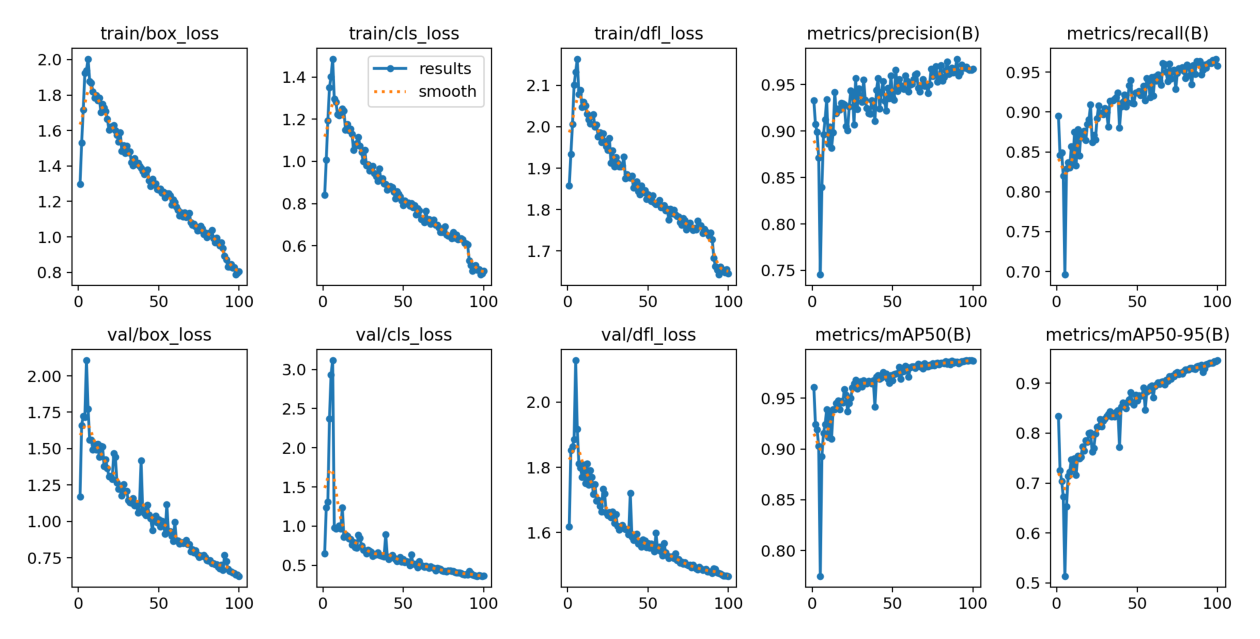

In [32]:
import matplotlib.pyplot as plt

img = Image.open('/content/runs/detect/train6/results.png')
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

***V10N - 2.3M params***

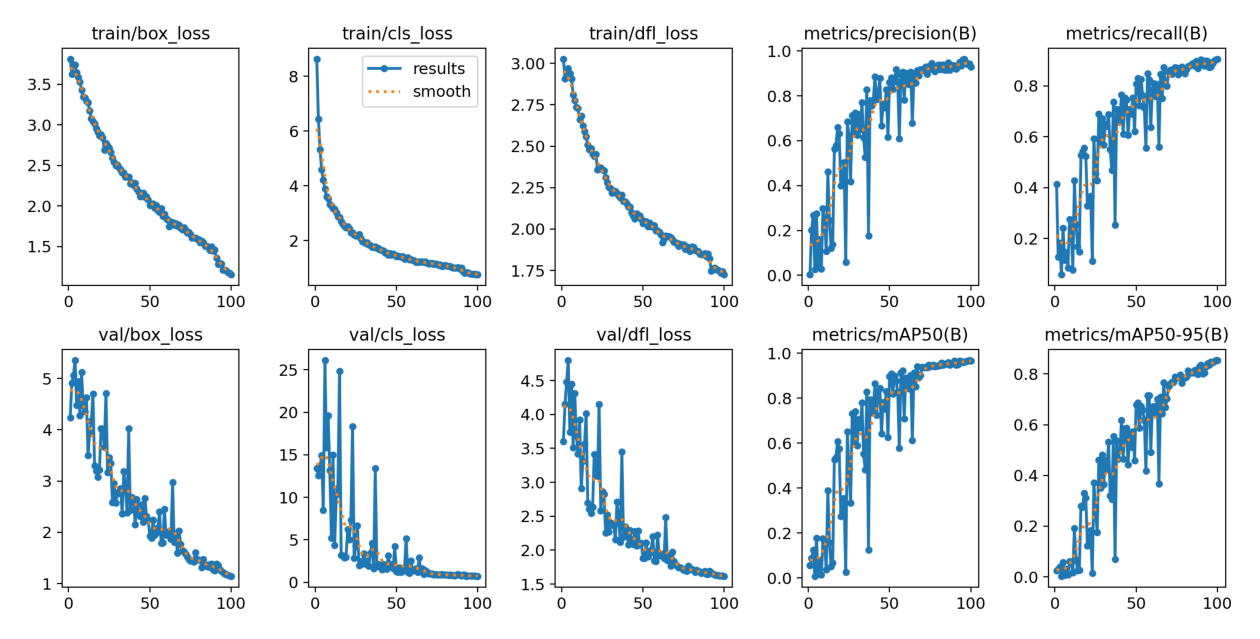

In [ ]:
import matplotlib.pyplot as plt

img = Image.open('/content/runs/detect/train/results.png')
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

20 эпох

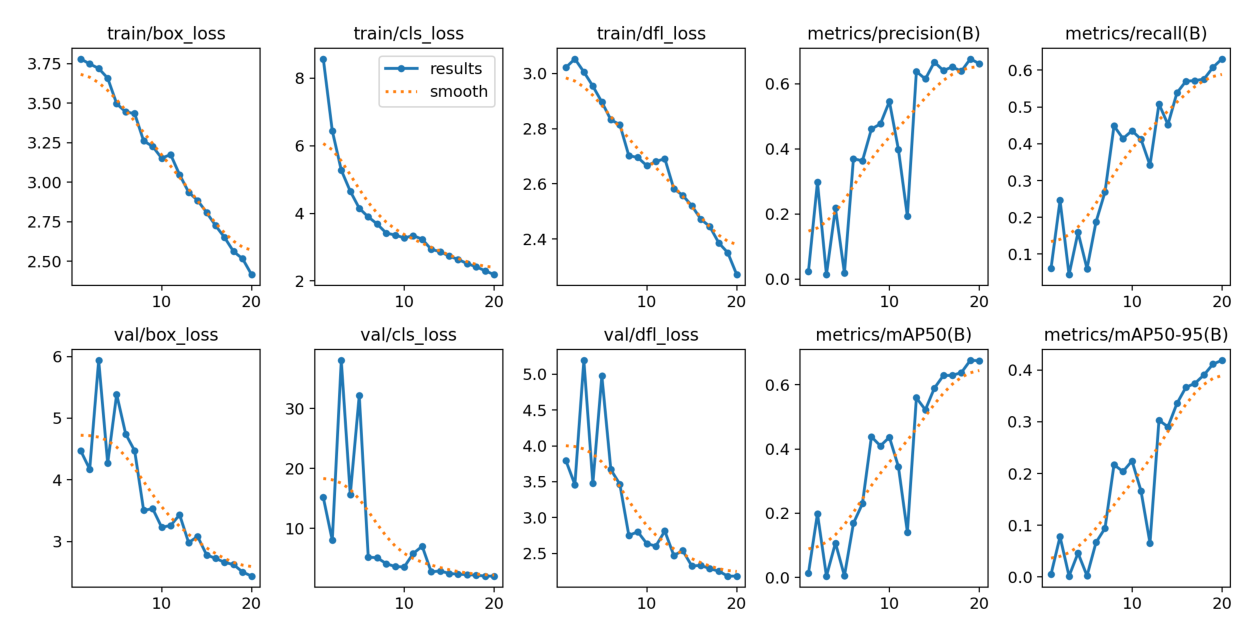

In [ ]:
import matplotlib.pyplot as plt

img = Image.open('/content/runs/detect/train/results.png')
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

**100 эпох старые веса с дисперсией 800**

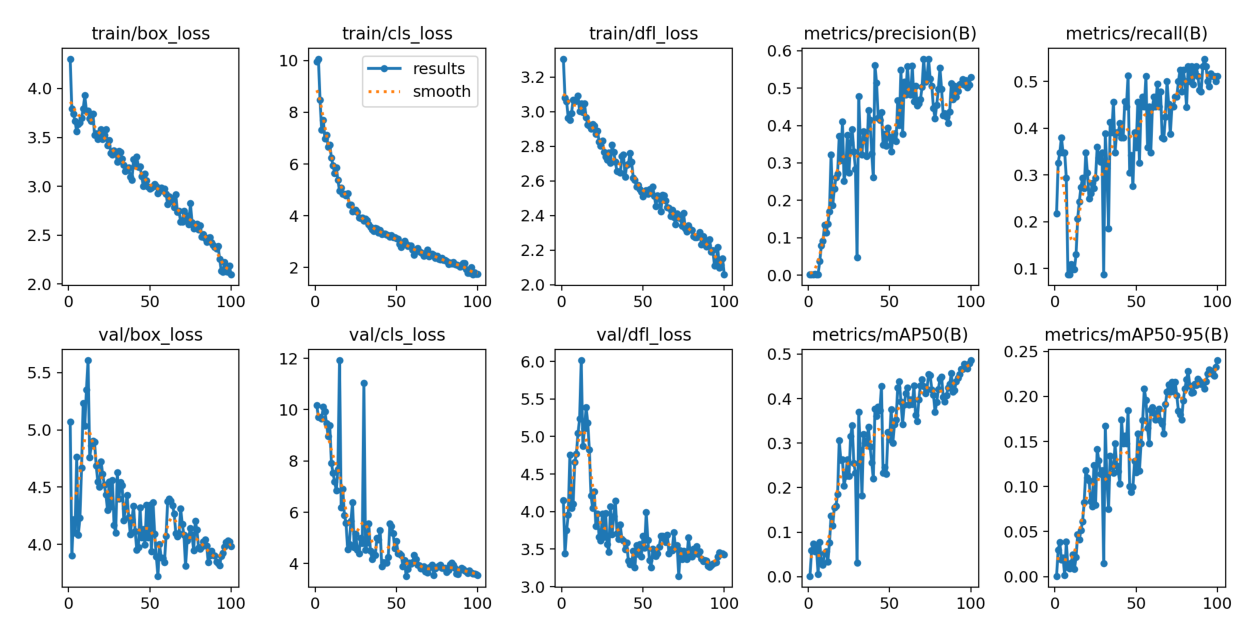

In [ ]:
import matplotlib.pyplot as plt

img = Image.open('/content/runs/detect/train/results.png')
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
model.val(data='/content/drive/MyDrive/data_iitp_yaml.yaml')

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/data_final/labels/val.cache... 50 images, 25 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]


                   all         50         92       0.54        0.5      0.484      0.238
Speed: 0.5ms preprocess, 52.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f74199eddb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Работа детектора(первое изображение - разметка, второе - результаты детектирования)
Все изображения из валидационной выборки, которая не участвовала в процессе обучения

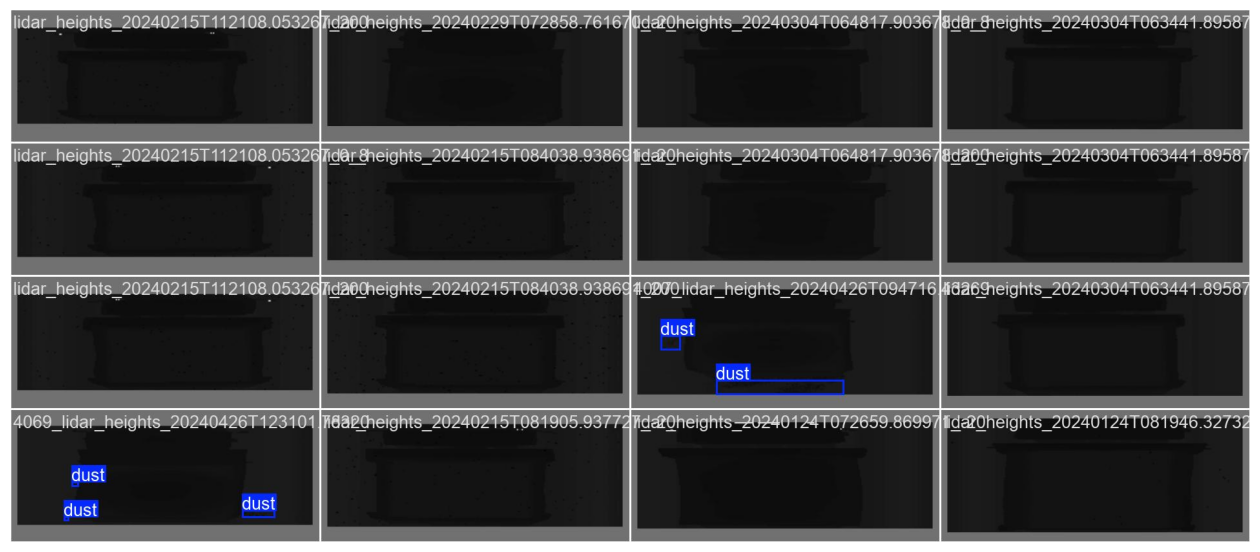

In [ ]:
import matplotlib.pyplot as plt

img = Image.open('/content/runs/detect/train/val_batch0_labels.jpg')
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

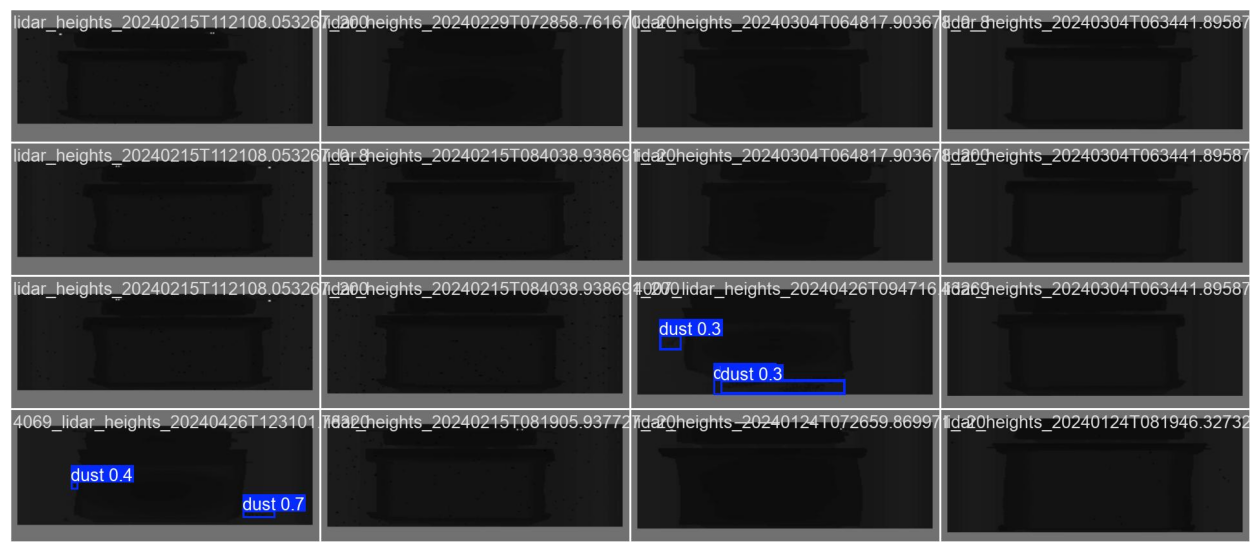

In [ ]:
import matplotlib.pyplot as plt

img = Image.open('/content/runs/detect/train/val_batch0_pred.jpg')
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.axis('off')
plt.show()